In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_roc_curve, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, RandomizedSearchCV, GridSearchCV

In [3]:
from imblearn.pipeline import Pipeline, make_pipeline
import imblearn.over_sampling

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Make some room to see stuff (i.e. drop display limits on Pandas rows & cols - be careful w/ big df's!)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 1) Read in the dataset Train/Val/Test data & targets
#### (Previously created, including engineered features and without dropping 1st col of 1-hots, in another worksheet)

In [6]:
X_train = pd.read_csv('dataset_with_new_features_train_randomState42.csv', index_col=0)
print(X_train.shape)
X_train.head()

(16971, 71)


,age,gender,asa_status,bmi,baseline_cancer,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,baseline_charlson,mortality_rsi,complication_rsi,ccsMort30Rate,ccsComplicationRate,race_1.0,race_2.0,race_3.0,ahrq_ccs_<Other>,ahrq_ccs_Arthroplasty knee,ahrq_ccs_Colorectal resection,ahrq_ccs_Endoscopy and endoscopic biopsy of the urinary tract,ahrq_ccs_Gastrectomy; partial and total,ahrq_ccs_Genitourinary incontinence procedures,ahrq_ccs_Hip replacement; total and partial,ahrq_ccs_Hysterectomy; abdominal and vaginal,ahrq_ccs_Inguinal and femoral hernia repair,ahrq_ccs_Laminectomy; excision intervertebral disc,ahrq_ccs_Lumpectomy; quadrantectomy of breast,ahrq_ccs_Mastectomy,ahrq_ccs_Nephrectomy; partial or complete,ahrq_ccs_Oophorectomy; unilateral and bilateral,ahrq_ccs_Open prostatectomy,ahrq_ccs_Other excision of cervix and uterus,ahrq_ccs_Other hernia repair,ahrq_ccs_Plastic procedures on nose,ahrq_ccs_Repair of cystocele and rectocele; obliteration of vaginal vault,ahrq_ccs_Small bowel resection,ahrq_ccs_Spinal fusion,ahrq_ccs_Thyroidectomy; partial or complete,ahrq_ccs_Transurethral resection of prostate (TURP),age_exp,age_log,age_sq,age_cube,asa_status_exp,asa_status_log,asa_status_sq,asa_status_cube,bmi_exp,bmi_log,bmi_sq,bmi_cube,baseline_charlson_exp,baseline_charlson_sq,baseline_charlson_cube,mortality_rsi_exp,mortality_rsi_sq,mortality_rsi_cube,complication_rsi_exp,complication_rsi_sq,complication_rsi_cube,ccsMort30Rate_exp,ccsMort30Rate_sq,ccsMort30Rate_cube,ccsComplicationRate_exp,ccsComplicationRate_log,ccsComplicationRate_sq,ccsComplicationRate_cube
29384,74.8,1.0,2.0,31.73,1,1,0,0,0,0,0,0,0,-0.45,-1.35,0.007424,0.183370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.056520e+32,1.873902,5595.04,418508.992,7.389056,0.30103,4.0,8.0,6.027870e+13,1.501470,1006.7929,31945.538717,1.000000,0,0,0.637628,0.2025,-0.091125,0.259240,1.8225,-2.460375,1.007452,5.511444e-05,4.091646e-07,1.201259,-0.736671,0.033625,0.006166
9519,35.1,0.0,1.0,22.56,1,0,0,0,0,0,0,0,6,3.65,2.91,0.007398,0.097476,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.752816e+15,1.545307,1232.01,43243.551,2.718282,0.00000,1.0,1.0,6.276008e+09,1.353339,508.9536,11481.993216,403.428793,36,216,38.474666,13.3225,48.627125,18.356799,8.4681,24.642171,1.007425,5.472656e-05,4.048528e-07,1.102385,-1.011102,0.009502,0.000926
9928,78.9,1.0,2.0,20.62,0,1,0,0,0,1,0,0,1,-0.20,0.26,0.007398,0.097476,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.844313e+34,1.897077,6225.21,491169.069,7.389056,0.30103,4.0,8.0,9.018872e+08,1.314289,425.1844,8767.302328,2.718282,1,1,0.818731,0.0400,-0.008000,1.296930,0.0676,0.017576,1.007425,5.472656e-05,4.048528e-07,1.102385,-1.011102,0.009502,0.000926
22483,68.1,1.0,2.0,32.16,1,1,0,1,0,0,0,0,3,-0.86,-0.76,0.000373,0.109369,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.762307e+29,1.833147,4637.61,315821.241,7.389056,0.30103,4.0,8.0,9.266389e+13,1.507316,1034.2656,33261.981696,20.085537,9,27,0.423162,0.7396,-0.636056,0.467666,0.5776,-0.438976,1.000373,1.393305e-07,5.200789e-11,1.115574,-0.961105,0.011962,0.001308
29900,64.3,0.0,1.0,25.45,1,0,0,0,0,0,0,0,2,0.00,0.00,0.000672,0.016118,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8.416571e+27,1.808211,4134.49,265847.707,2.718282,0.00000,1.0,1.0,1.129262e+11,1.405688,647.7025,16484.028625,7.389056,4,8,1.000000,0.0000,0.000000,1.000000,0.0000,0.000000,1.000672,4.510331e-07,3.029093e-10,1.016249,-1.792683,0.000260,0.000004


In [7]:
y_train = pd.read_csv('target_train_randomState42.csv', index_col=0)
print(y_train.shape)
y_train.head()

(16971, 2)


,mort30,complication
29384,0,0
9519,0,0
9928,0,1
22483,0,0
29900,0,0


In [8]:
X_val = pd.read_csv('dataset_with_new_features_val_randomState42.csv', index_col=0)
print(X_val.shape)
X_val.head()

(5658, 71)


,age,gender,asa_status,bmi,baseline_cancer,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,baseline_charlson,mortality_rsi,complication_rsi,ccsMort30Rate,ccsComplicationRate,race_1.0,race_2.0,race_3.0,ahrq_ccs_<Other>,ahrq_ccs_Arthroplasty knee,ahrq_ccs_Colorectal resection,ahrq_ccs_Endoscopy and endoscopic biopsy of the urinary tract,ahrq_ccs_Gastrectomy; partial and total,ahrq_ccs_Genitourinary incontinence procedures,ahrq_ccs_Hip replacement; total and partial,ahrq_ccs_Hysterectomy; abdominal and vaginal,ahrq_ccs_Inguinal and femoral hernia repair,ahrq_ccs_Laminectomy; excision intervertebral disc,ahrq_ccs_Lumpectomy; quadrantectomy of breast,ahrq_ccs_Mastectomy,ahrq_ccs_Nephrectomy; partial or complete,ahrq_ccs_Oophorectomy; unilateral and bilateral,ahrq_ccs_Open prostatectomy,ahrq_ccs_Other excision of cervix and uterus,ahrq_ccs_Other hernia repair,ahrq_ccs_Plastic procedures on nose,ahrq_ccs_Repair of cystocele and rectocele; obliteration of vaginal vault,ahrq_ccs_Small bowel resection,ahrq_ccs_Spinal fusion,ahrq_ccs_Thyroidectomy; partial or complete,ahrq_ccs_Transurethral resection of prostate (TURP),age_exp,age_log,age_sq,age_cube,asa_status_exp,asa_status_log,asa_status_sq,asa_status_cube,bmi_exp,bmi_log,bmi_sq,bmi_cube,baseline_charlson_exp,baseline_charlson_sq,baseline_charlson_cube,mortality_rsi_exp,mortality_rsi_sq,mortality_rsi_cube,complication_rsi_exp,complication_rsi_sq,complication_rsi_cube,ccsMort30Rate_exp,ccsMort30Rate_sq,ccsMort30Rate_cube,ccsComplicationRate_exp,ccsComplicationRate_log,ccsComplicationRate_sq,ccsComplicationRate_cube
15110,78.1,1.0,2.0,24.82,0,1,0,0,0,0,0,0,1,-0.77,-1.75,0.000789,0.105720,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8.287032e+33,1.892651,6099.61,476379.541,7.389056,0.30103,4.0,8.0,6.014355e+10,1.394802,616.0324,15289.924168,2.718282,1,1,0.463013,0.5929,-0.456533,0.173774,3.0625,-5.359375,1.000789,6.224579e-07,4.910944e-10,1.111511,-0.975843,0.011177,0.001182
27752,69.2,0.0,2.0,36.10,0,1,0,1,0,0,0,0,1,-0.57,-0.83,0.007424,0.183370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.130259e+30,1.840106,4788.64,331373.888,7.389056,0.30103,4.0,8.0,4.764648e+15,1.557507,1303.2100,47045.881000,2.718282,1,1,0.565525,0.3249,-0.185193,0.436049,0.6889,-0.571787,1.007452,5.511444e-05,4.091646e-07,1.201259,-0.736671,0.033625,0.006166
22388,71.0,1.0,2.0,22.05,1,1,0,0,0,0,0,0,2,-1.30,-0.83,0.000373,0.109369,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6.837671e+30,1.851258,5041.00,357911.000,7.389056,0.30103,4.0,8.0,3.768715e+09,1.343409,486.2025,10720.765125,7.389056,4,8,0.272532,1.6900,-2.197000,0.436049,0.6889,-0.571787,1.000373,1.393305e-07,5.200789e-11,1.115574,-0.961105,0.011962,0.001308
28742,71.7,0.0,1.0,28.71,1,0,0,0,1,0,1,0,0,-0.06,0.70,0.007424,0.183370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.376938e+31,1.855519,5140.89,368601.813,2.718282,0.00000,1.0,1.0,2.941674e+12,1.458033,824.2641,23664.622311,1.000000,0,0,0.941765,0.0036,-0.000216,2.013753,0.4900,0.343000,1.007452,5.511444e-05,4.091646e-07,1.201259,-0.736671,0.033625,0.006166
9326,61.9,0.0,2.0,20.60,0,1,0,0,0,1,0,1,1,-1.03,-0.16,0.007398,0.097476,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.635341e+26,1.791691,3831.61,237176.659,7.389056,0.30103,4.0,8.0,8.840286e+08,1.313867,424.3600,8741.816000,2.718282,1,1,0.357007,1.0609,-1.092727,0.852144,0.0256,-0.004096,1.007425,5.472656e-05,4.048528e-07,1.102385,-1.011102,0.009502,0.000926


In [9]:
y_val = pd.read_csv('target_val_randomState42.csv', index_col=0)
print(y_val.shape)
y_val.head()

(5658, 2)


,mort30,complication
15110,0,0
27752,0,1
22388,0,0
28742,0,0
9326,0,0


In [10]:
X_test = pd.read_csv('dataset_with_new_features_test_randomState42.csv', index_col=0)
print(X_test.shape)
X_test.head()

(5658, 71)


,age,gender,asa_status,bmi,baseline_cancer,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,baseline_charlson,mortality_rsi,complication_rsi,ccsMort30Rate,ccsComplicationRate,race_1.0,race_2.0,race_3.0,ahrq_ccs_<Other>,ahrq_ccs_Arthroplasty knee,ahrq_ccs_Colorectal resection,ahrq_ccs_Endoscopy and endoscopic biopsy of the urinary tract,ahrq_ccs_Gastrectomy; partial and total,ahrq_ccs_Genitourinary incontinence procedures,ahrq_ccs_Hip replacement; total and partial,ahrq_ccs_Hysterectomy; abdominal and vaginal,ahrq_ccs_Inguinal and femoral hernia repair,ahrq_ccs_Laminectomy; excision intervertebral disc,ahrq_ccs_Lumpectomy; quadrantectomy of breast,ahrq_ccs_Mastectomy,ahrq_ccs_Nephrectomy; partial or complete,ahrq_ccs_Oophorectomy; unilateral and bilateral,ahrq_ccs_Open prostatectomy,ahrq_ccs_Other excision of cervix and uterus,ahrq_ccs_Other hernia repair,ahrq_ccs_Plastic procedures on nose,ahrq_ccs_Repair of cystocele and rectocele; obliteration of vaginal vault,ahrq_ccs_Small bowel resection,ahrq_ccs_Spinal fusion,ahrq_ccs_Thyroidectomy; partial or complete,ahrq_ccs_Transurethral resection of prostate (TURP),age_exp,age_log,age_sq,age_cube,asa_status_exp,asa_status_log,asa_status_sq,asa_status_cube,bmi_exp,bmi_log,bmi_sq,bmi_cube,baseline_charlson_exp,baseline_charlson_sq,baseline_charlson_cube,mortality_rsi_exp,mortality_rsi_sq,mortality_rsi_cube,complication_rsi_exp,complication_rsi_sq,complication_rsi_cube,ccsMort30Rate_exp,ccsMort30Rate_sq,ccsMort30Rate_cube,ccsComplicationRate_exp,ccsComplicationRate_log,ccsComplicationRate_sq,ccsComplicationRate_cube
13878,57.1,1.0,1.0,31.51,0,0,0,0,0,0,0,0,0,-0.43,-1.65,0.000789,0.105720,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.283692e+24,1.756636,3260.41,186169.411,2.718282,0.0,1.0,1.0,4.837479e+13,1.498448,992.8801,31285.651951,1.000000,0,0,0.650509,0.1849,-0.079507,0.192050,2.7225,-4.492125,1.000789,6.224579e-07,4.910944e-10,1.111511,-0.975843,0.011177,0.001182
28195,46.0,1.0,1.0,27.12,0,0,0,0,0,0,0,0,0,-1.33,0.00,0.007424,0.183370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9.496119e+19,1.662758,2116.00,97336.000,2.718282,0.0,1.0,1.0,5.998827e+11,1.433290,735.4944,19946.608128,1.000000,0,0,0.264477,1.7689,-2.352637,1.000000,0.0000,0.000000,1.007452,5.511444e-05,4.091646e-07,1.201259,-0.736671,0.033625,0.006166
22111,60.4,1.0,1.0,28.75,1,1,0,0,1,0,0,0,2,-0.86,-0.26,0.000373,0.109369,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.703675e+26,1.781037,3648.16,220348.864,2.718282,0.0,1.0,1.0,3.061726e+12,1.458638,826.5625,23763.671875,7.389056,4,8,0.423162,0.7396,-0.636056,0.771052,0.0676,-0.017576,1.000373,1.393305e-07,5.200789e-11,1.115574,-0.961105,0.011962,0.001308
29383,38.8,0.0,1.0,34.48,0,0,0,0,0,0,0,0,0,0.00,0.00,0.007424,0.183370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7.089668e+16,1.588832,1505.44,58411.072,2.718282,0.0,1.0,1.0,9.429176e+14,1.537567,1188.8704,40992.251392,1.000000,0,0,1.000000,0.0000,0.000000,1.000000,0.0000,0.000000,1.007452,5.511444e-05,4.091646e-07,1.201259,-0.736671,0.033625,0.006166
20936,50.6,1.0,1.0,29.97,1,0,0,0,0,0,0,1,9,1.05,0.57,0.000373,0.109369,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,9.447149e+21,1.704151,2560.36,129554.216,2.718282,0.0,1.0,1.0,1.037064e+13,1.476687,898.2009,26919.080973,8103.083928,81,729,2.857651,1.1025,1.157625,1.768267,0.3249,0.185193,1.000373,1.393305e-07,5.200789e-11,1.115574,-0.961105,0.011962,0.001308


In [11]:
y_test = pd.read_csv('target_test_randomState42.csv', index_col=0)
print(y_test.shape)
y_test.head()

(5658, 2)


,mort30,complication
13878,0,0
28195,0,0
22111,0,0
29383,0,0
20936,0,0


#### Need to drop the first column of both one-hots for Logistic Regression

In [12]:
print(X_train.shape)
X_train = X_train.drop(columns=['race_1.0', 'ahrq_ccs_<Other>'])
print(X_train.shape)

print('\n')

print(X_val.shape)
X_val = X_val.drop(columns=['race_1.0', 'ahrq_ccs_<Other>'])
print(X_val.shape)

print('\n')

print(X_test.shape)
X_test = X_test.drop(columns=['race_1.0', 'ahrq_ccs_<Other>'])
print(X_test.shape)

(16971, 71)
(16971, 69)


(5658, 71)
(5658, 69)


(5658, 71)
(5658, 69)


## 2) Scale the data for regularization

In [13]:
## Columns to scale were identified and stored to file in previous logistic_regression workbook

scaled_cols = [val[0] for val in pd.read_csv('scaled_cols.csv', index_col=0).values]

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[scaled_cols])
X_train_scaled = np.concatenate([X_train_scaled,
                                 X_train.drop(columns=scaled_cols)], axis=1)

print('X_train_scaled shape: {}'.format(X_train_scaled.shape))

X_train_scaled shape: (16971, 69)


In [15]:
X_val_scaled = scaler.fit_transform(X_val[scaled_cols])
X_val_scaled = np.concatenate([X_val_scaled,
                               X_val.drop(columns=scaled_cols)], axis=1)

print('X_val_scaled shape: {}'.format(X_val_scaled.shape))

X_val_scaled shape: (5658, 69)


In [16]:
X_test_scaled = scaler.fit_transform(X_test[scaled_cols])
X_test_scaled = np.concatenate([X_test_scaled,
                                X_test.drop(columns=scaled_cols)], axis=1)

print('X_test_scaled shape: {}'.format(X_test_scaled.shape))

X_test_scaled shape: (5658, 69)


## 3) Define Necessary Functions

In [17]:
def auc_proba_scorer(model, X, y):
    y_pred = model.predict_proba(X)[:,1]
    return roc_auc_score(y, y_pred)

In [18]:
def cv_aurocs(x, y, model, cv):
    scores = cross_val_score(model, x, y, scoring=auc_proba_scorer, cv=cv)
    scores = [round(val, 3) for val in scores]
    
    print('\nCV AUROCs: {}'.format(scores)) 
    print('Mean CV AUROC: {} +/- {}'.format(round(np.mean(scores), 3), round(np.std(scores), 3)))

In [19]:
def plot_prec_recall(y_1, y_1_pred, y_2=None, y_2_pred=None, single_title=None, single=False):
    precisions1, recalls1, threshs1 = precision_recall_curve(y_1, y_1_pred )
    if single:
        N = 1
    else:
        N = 2
        precisions2, recalls2, threshs2 = precision_recall_curve(y_2, y_2_pred )
    
    plt.figure(figsize=(8*N,10), dpi=80)
    plt.subplot(2, N, 1)
    plt.plot(threshs1, precisions1[1:], label='Precision', lw=3)
    plt.plot(threshs1, recalls1[1:], label='Recall', lw=3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xticks(np.linspace(0,1,11))
    plt.yticks(np.linspace(0,1,11))
    plt.grid(b=True)
    plt.legend(prop={"size":12})
    plt.xlabel('Threshold', size=13)
    if single_title == None:
        plt.title('Training Set', size=20)
    else:
        plt.title(single_title, size=20)
    plt.xticks(size=12)
    plt.yticks(size=12)
    
    if N == 2:
        plt.subplot(2, N, 2)
        plt.plot(threshs2, precisions2[1:], label='Precision', lw=3)
        plt.plot(threshs2, recalls2[1:], label='Recall', lw=3)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xticks(np.linspace(0,1,11))
        plt.yticks(np.linspace(0,1,11))
        plt.grid(b=True)
        plt.legend(prop={"size":12})
        plt.xlabel('Threshold', size=13)
        plt.title('Validation Set', size=20)
        plt.xticks(size=12)
        plt.yticks(size=12)
    
    plt.subplot(2, N, N+1)
    plt.plot(recalls1[1:], precisions1[1:], lw=3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xticks(np.linspace(0,1,11))
    plt.yticks(np.linspace(0,1,11))
    plt.grid(b=True)
    plt.xlabel("Recall", size=16)
    plt.ylabel("Precision", size=16)
    plt.xticks(size=12)
    plt.yticks(size=12)
    
    if N == 2:
        plt.subplot(2, N, 4)
        plt.plot(recalls2[1:], precisions2[1:], lw=3)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xticks(np.linspace(0,1,11))
        plt.yticks(np.linspace(0,1,11))
        plt.grid(b=True)
        plt.xlabel("Recall", size=16)
        plt.ylabel("Precision", size=16)
        plt.xticks(size=12)
        plt.yticks(size=12);

In [20]:
def plot_aurocs(y_1, y_1_pred, y_2=None, y_2_pred=None, single_title=None, single=False):
    fpr1, tpr1, thresholds1 = roc_curve(y_1, y_1_pred)
    roc_auc1 = roc_auc_score(y_1, y_1_pred)
    if not single:
        fpr2, tpr2, thresholds2 = roc_curve(y_2, y_2_pred)
        roc_auc2 = roc_auc_score(y_2, y_2_pred)
    
    plt.figure(figsize=(10,10), dpi=80)
    if single_title != None:
        plt.plot(fpr1, tpr1, lw=3, label=single_title + '(AUC = %0.3f)' % roc_auc1)
    else:
        plt.plot(fpr1, tpr1, lw=3, label='Training Set (AUC = %0.3f)' % roc_auc1)
    if not single:
        plt.plot(fpr2, tpr2, lw=3, label='Validation Set (AUC = %0.3f)' % roc_auc2)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xticks(np.linspace(0,1,11))
    plt.yticks(np.linspace(0,1,11))
    plt.grid(b=True)
    plt.title('AUROC', size=20)
    plt.legend(prop={"size":12})
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)
    plt.xticks(size=12)
    plt.yticks(size=12);

## 4) Hyperparameter tuning (using 'neg_log_loss' instead of 'roc_auc' scoring)

In [21]:
params = {'C': [1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 2],
          'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
new_params = {'logisticregression__' + key: params[key] for key in params}

imba_pipeline = make_pipeline(LogisticRegression(penalty='elasticnet', solver='saga', 
                                                 random_state=42, max_iter=1000000))

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=5, scoring='neg_log_loss',
                        return_train_score=True)
grid_imba.fit(X_train_scaled, y_train['mort30'])
grid_imba.best_params_

{'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.7}

In [22]:
grid_imba.cv_results_

{'mean_fit_time': array([ 2.80892282,  0.01382632,  0.01381707,  0.01384959,  0.01387062,
         0.01385198,  0.01382198,  0.01382318,  0.01379175,  0.01379519,
         0.01378198,  2.94031062,  0.0138279 ,  0.01383386,  0.01395078,
         0.01381755,  0.01375179,  0.01380091,  0.0137773 ,  0.01378698,
         0.01388316,  0.01385031,  3.17493253,  0.08013244,  0.06579843,
         0.06032143,  0.04038606,  0.03372455,  0.02709217,  0.01705265,
         0.01699862,  0.01367111,  0.01366949,  5.11286979,  4.07401381,
         3.91653867,  3.56419425,  1.48792524,  0.19885583,  0.16762166,
         0.1480124 ,  0.12814679,  0.11730056,  0.10364857, 11.14927683,
         8.21958957,  7.74834657,  7.51822824,  7.59522276,  7.70609937,
         7.87048392,  7.84151483,  7.58512235,  6.51356053,  5.83472605,
        27.67966294, 32.16619658, 27.66334343, 24.19550295, 22.28815784,
        19.6721416 , 18.89724817, 18.68766737, 18.37191167, 18.11045241,
        18.06575813, 41.28378925, 

In [23]:
params = {'C': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
          'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
new_params = {'logisticregression__' + key: params[key] for key in params}

imba_pipeline = make_pipeline(LogisticRegression(penalty='elasticnet', solver='saga', 
                                                 random_state=42, max_iter=1000000))

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=5, scoring='neg_log_loss',
                        return_train_score=True)
grid_imba.fit(X_train_scaled, y_train['mort30'])
grid_imba.best_params_

{'logisticregression__C': 0.15, 'logisticregression__l1_ratio': 1}

In [24]:
lr_mort = LogisticRegression(penalty='elasticnet', C=0.15, solver='saga', l1_ratio=1, 
                             random_state=42, max_iter=10000)

cv_aurocs(X_train_scaled, y_train['mort30'], lr_mort, 5)


CV AUROCs: [0.884, 0.908, 0.988, 0.916, 0.889]
Mean CV AUROC: 0.917 +/- 0.037


Training Set AUROC: 0.9332998047452814
Validation Set AUROC: 0.9463369468770495






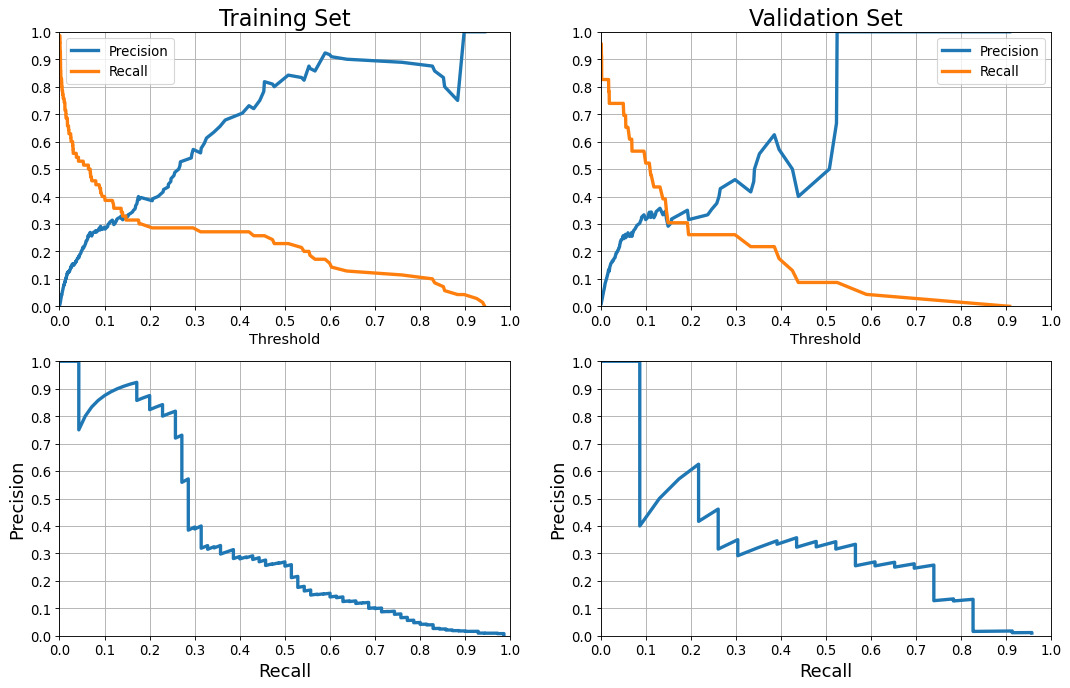

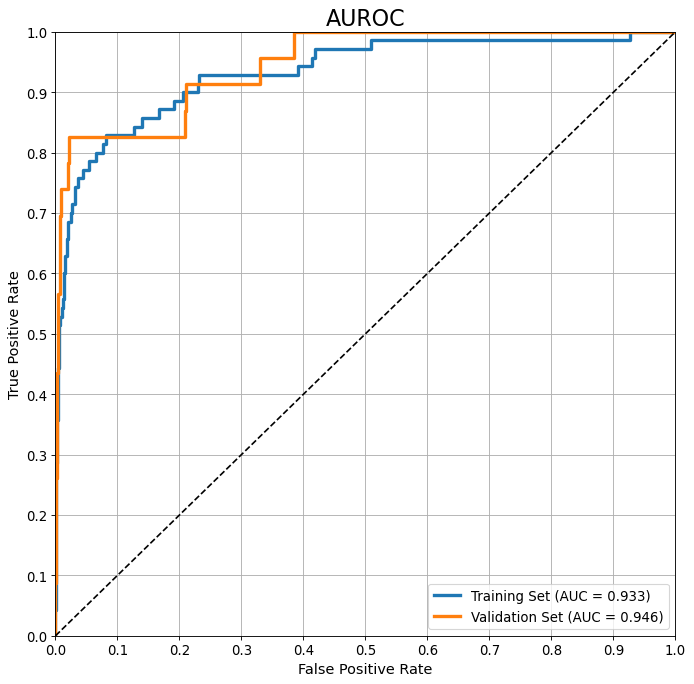

In [25]:
lr_mort.fit(X_train_scaled, y_train['mort30'])

y_train_pred = lr_mort.predict_proba(X_train_scaled)[:,1]

X_val_scaled = np.concatenate([scaler.transform(X_val[scaled_cols]),
                                 X_val.drop(columns=scaled_cols)], axis=1)

y_val_pred = lr_mort.predict_proba(X_val_scaled)[:,1]

print('Training Set AUROC: {}'.format(roc_auc_score(y_train['mort30'], y_train_pred)))
print('Validation Set AUROC: {}'.format(roc_auc_score(y_val['mort30'], y_val_pred)))
print('\n')
plot_prec_recall(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)
print ('\n')
plot_aurocs(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)

### Now let's try adding some class weighting

In [26]:
lr_mort = LogisticRegression(penalty='elasticnet', C=0.15, solver='saga', l1_ratio=1, 
                             random_state=42, max_iter=10000, class_weight={1 : 10, 0 : 1})

cv_aurocs(X_train_scaled, y_train['mort30'], lr_mort, 5)


CV AUROCs: [0.819, 0.888, 0.923, 0.893, 0.876]
Mean CV AUROC: 0.88 +/- 0.034


Training Set AUROC: 0.9491230442830941
Validation Set AUROC: 0.9472011110682458






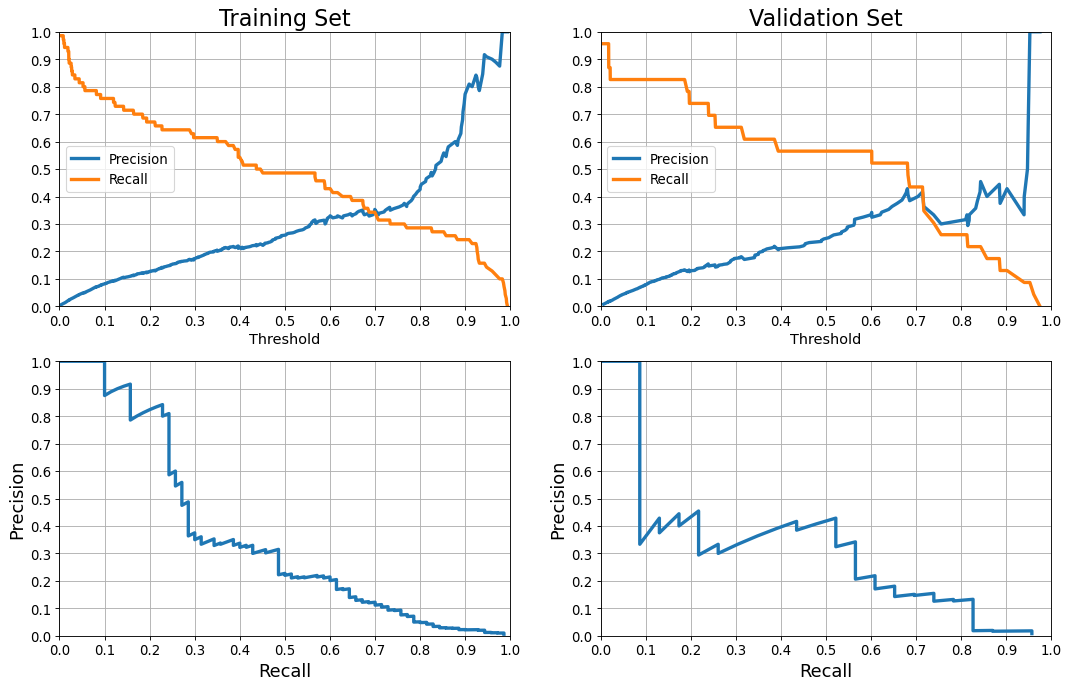

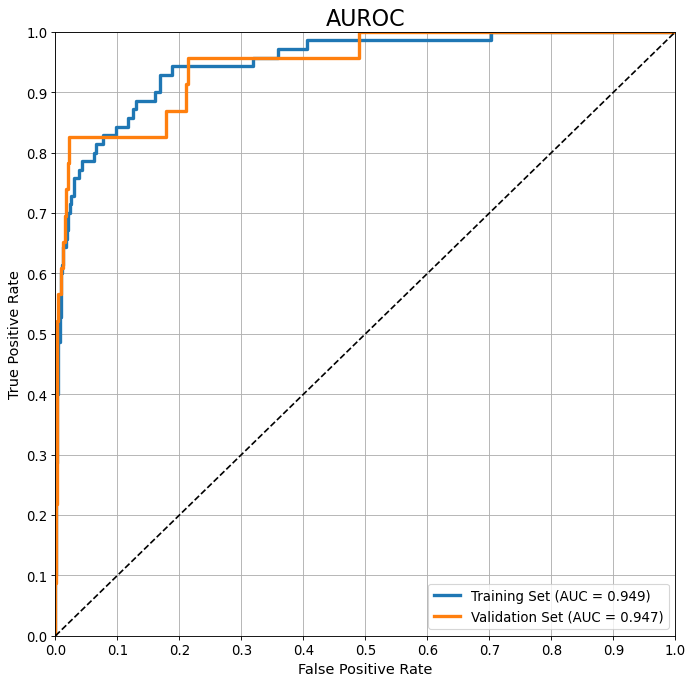

In [27]:
lr_mort.fit(X_train_scaled, y_train['mort30'])

y_train_pred = lr_mort.predict_proba(X_train_scaled)[:,1]

X_val_scaled = np.concatenate([scaler.transform(X_val[scaled_cols]),
                                 X_val.drop(columns=scaled_cols)], axis=1)

y_val_pred = lr_mort.predict_proba(X_val_scaled)[:,1]

print('Training Set AUROC: {}'.format(roc_auc_score(y_train['mort30'], y_train_pred)))
print('Validation Set AUROC: {}'.format(roc_auc_score(y_val['mort30'], y_val_pred)))
print('\n')
plot_prec_recall(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)
print ('\n')
plot_aurocs(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)

In [28]:
lr_mort = LogisticRegression(penalty='elasticnet', C=0.15, solver='saga', l1_ratio=1, 
                             random_state=42, max_iter=10000, class_weight='balanced')

cv_aurocs(X_train_scaled, y_train['mort30'], lr_mort, 5)


CV AUROCs: [0.809, 0.821, 0.851, 0.865, 0.831]
Mean CV AUROC: 0.835 +/- 0.02


Training Set AUROC: 0.9694024867505726
Validation Set AUROC: 0.931021179738436






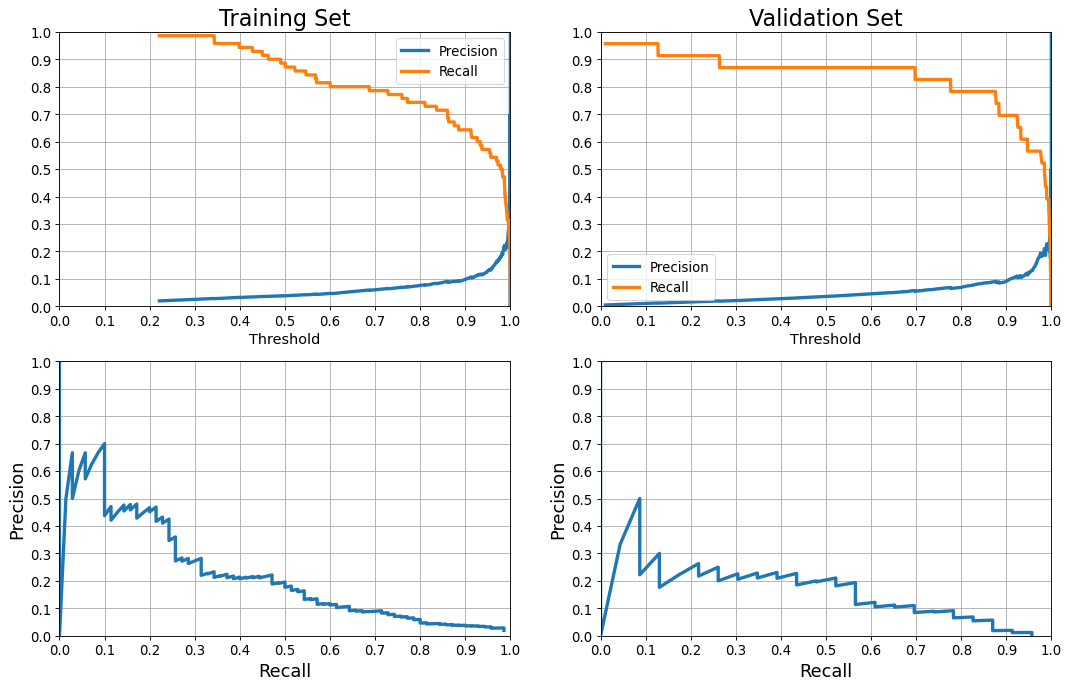

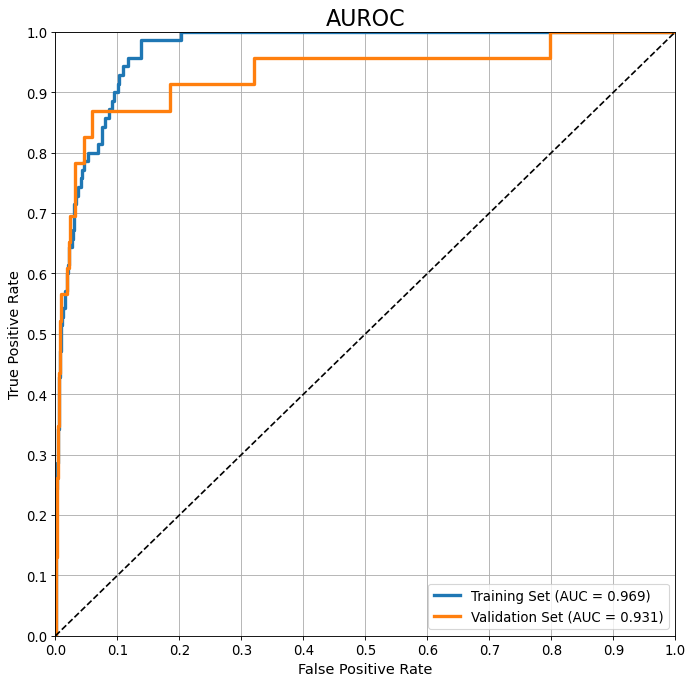

In [29]:
lr_mort.fit(X_train_scaled, y_train['mort30'])

y_train_pred = lr_mort.predict_proba(X_train_scaled)[:,1]

X_val_scaled = np.concatenate([scaler.transform(X_val[scaled_cols]),
                                 X_val.drop(columns=scaled_cols)], axis=1)

y_val_pred = lr_mort.predict_proba(X_val_scaled)[:,1]

print('Training Set AUROC: {}'.format(roc_auc_score(y_train['mort30'], y_train_pred)))
print('Validation Set AUROC: {}'.format(roc_auc_score(y_val['mort30'], y_val_pred)))
print('\n')
plot_prec_recall(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)
print ('\n')
plot_aurocs(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)

In [30]:
lr_mort = LogisticRegression(penalty='elasticnet', C=0.15, solver='saga', l1_ratio=1, 
                             random_state=42, max_iter=10000, class_weight={1 : 100, 0 : 1})

cv_aurocs(X_train_scaled, y_train['mort30'], lr_mort, 5)


CV AUROCs: [0.808, 0.835, 0.852, 0.878, 0.845]
Mean CV AUROC: 0.844 +/- 0.023


Training Set AUROC: 0.9685868122765349
Validation Set AUROC: 0.9341306276764014






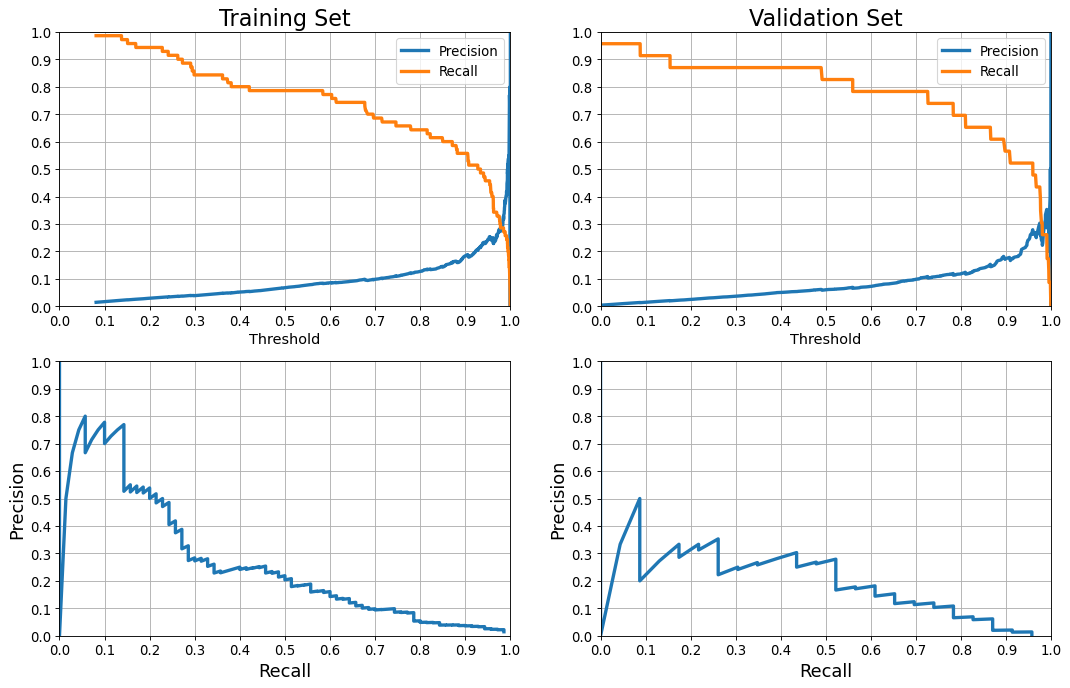

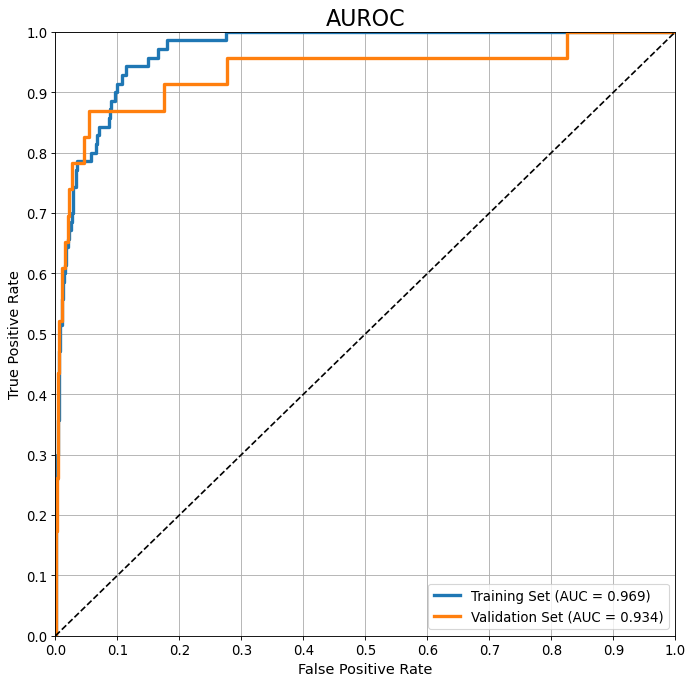

In [31]:
lr_mort.fit(X_train_scaled, y_train['mort30'])

y_train_pred = lr_mort.predict_proba(X_train_scaled)[:,1]

X_val_scaled = np.concatenate([scaler.transform(X_val[scaled_cols]),
                                 X_val.drop(columns=scaled_cols)], axis=1)

y_val_pred = lr_mort.predict_proba(X_val_scaled)[:,1]

print('Training Set AUROC: {}'.format(roc_auc_score(y_train['mort30'], y_train_pred)))
print('Validation Set AUROC: {}'.format(roc_auc_score(y_val['mort30'], y_val_pred)))
print('\n')
plot_prec_recall(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)
print ('\n')
plot_aurocs(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)

### Now let's try plain old oversampling with this set of variables (instead of class_weight balancing)

#### Using Pipeline method (see : https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html )

In [32]:
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 1.0, random_state=42)  # Balanced

imba_pipeline = make_pipeline(ROS, 
                              LogisticRegression(penalty='elasticnet', C=0.15, solver='saga', l1_ratio=1, 
                                                 random_state=42, max_iter=10000))

cv_aurocs(X_train_scaled, y_train['mort30'], imba_pipeline, 5)


CV AUROCs: [0.808, 0.823, 0.849, 0.866, 0.827]
Mean CV AUROC: 0.835 +/- 0.02


Training Set AUROC: 0.9701167302019322
Validation Set AUROC: 0.9293237143628719






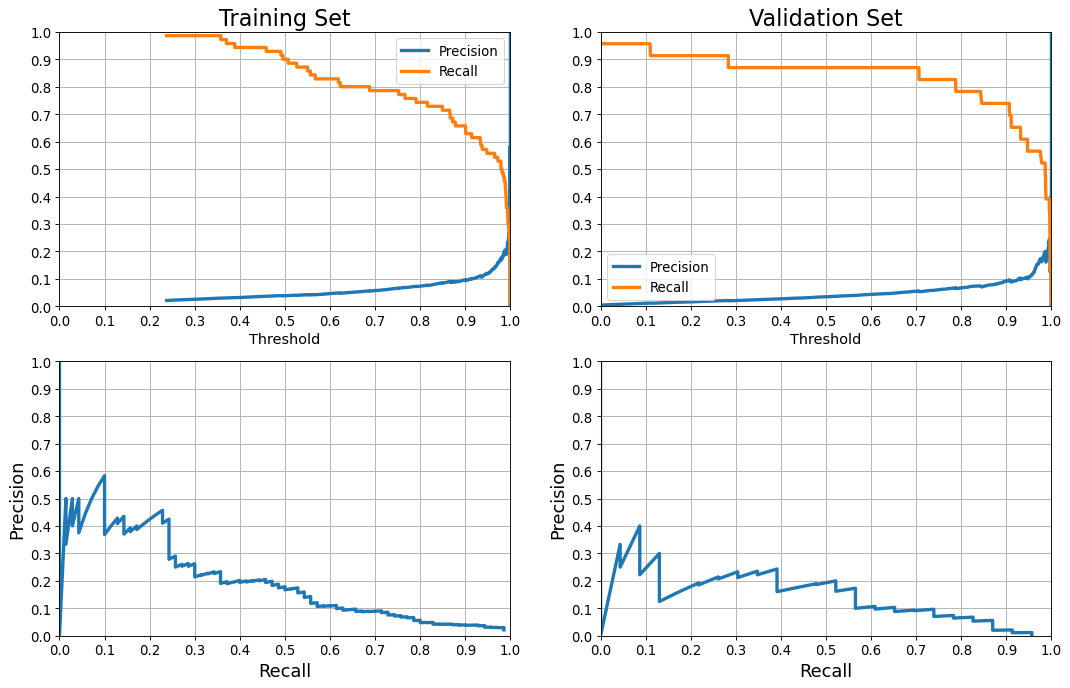

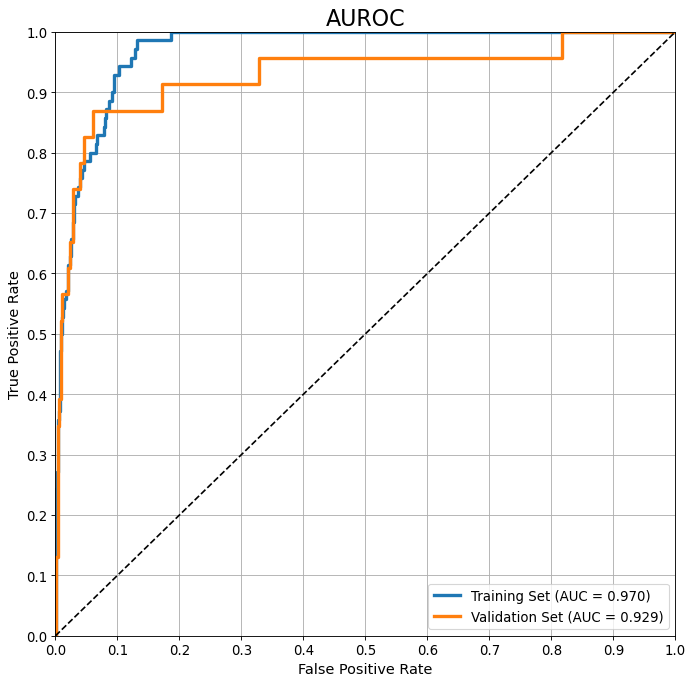

In [33]:
imba_pipeline.fit(X_train_scaled, y_train['mort30'])

y_train_pred = imba_pipeline.predict_proba(X_train_scaled)[:,1]

X_val_scaled = np.concatenate([scaler.transform(X_val[scaled_cols]),
                                 X_val.drop(columns=scaled_cols)], axis=1)

y_val_pred = imba_pipeline.predict_proba(X_val_scaled)[:,1]

print('Training Set AUROC: {}'.format(roc_auc_score(y_train['mort30'], y_train_pred)))
print('Validation Set AUROC: {}'.format(roc_auc_score(y_val['mort30'], y_val_pred)))
print('\n')
plot_prec_recall(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)
print ('\n')
plot_aurocs(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)

In [34]:
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 0.5, random_state=42)  # 2x more 0's

imba_pipeline = make_pipeline(ROS, 
                              LogisticRegression(penalty='elasticnet', C=0.15, solver='saga', l1_ratio=1, 
                                                 random_state=42, max_iter=10000))

cv_aurocs(X_train_scaled, y_train['mort30'], imba_pipeline, 5)


CV AUROCs: [0.809, 0.834, 0.851, 0.877, 0.839]
Mean CV AUROC: 0.842 +/- 0.022


Training Set AUROC: 0.9690347992933639
Validation Set AUROC: 0.9330812854442345






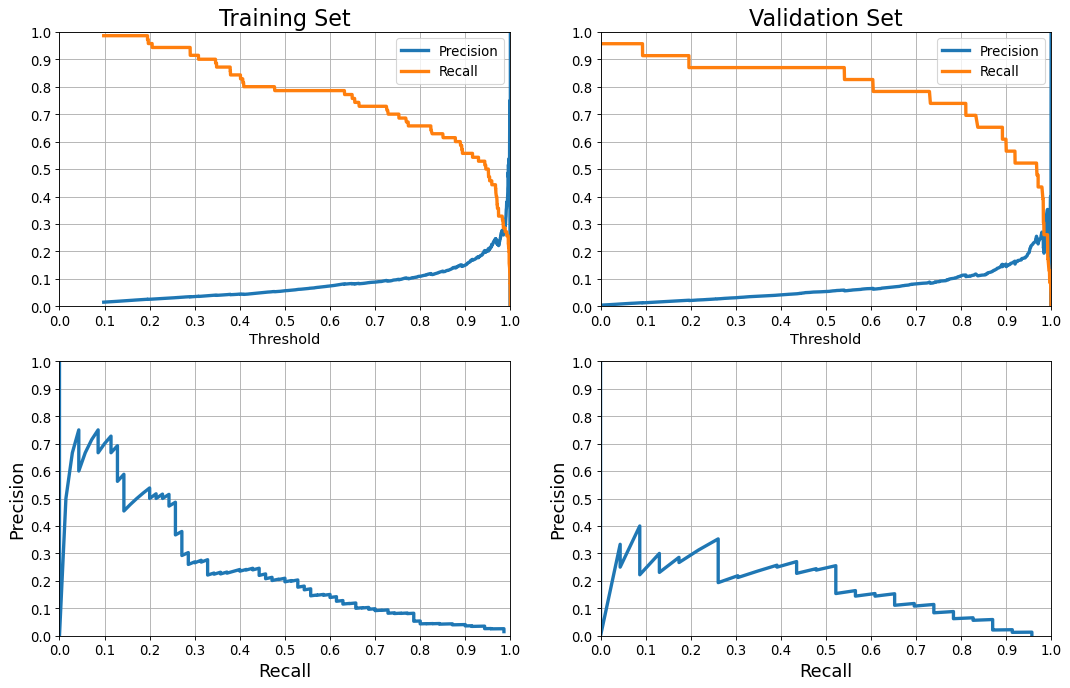

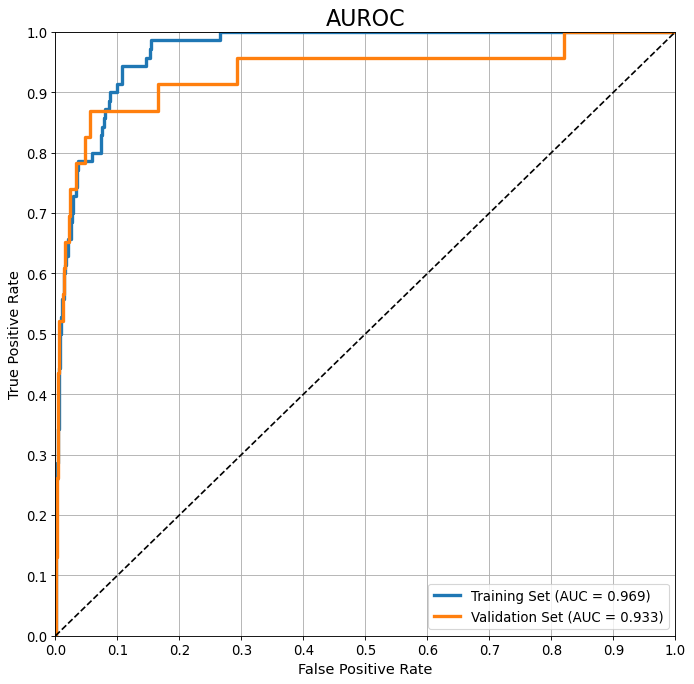

In [35]:
imba_pipeline.fit(X_train_scaled, y_train['mort30'])

y_train_pred = imba_pipeline.predict_proba(X_train_scaled)[:,1]

X_val_scaled = np.concatenate([scaler.transform(X_val[scaled_cols]),
                                 X_val.drop(columns=scaled_cols)], axis=1)

y_val_pred = imba_pipeline.predict_proba(X_val_scaled)[:,1]

print('Training Set AUROC: {}'.format(roc_auc_score(y_train['mort30'], y_train_pred)))
print('Validation Set AUROC: {}'.format(roc_auc_score(y_val['mort30'], y_val_pred)))
print('\n')
plot_prec_recall(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)
print ('\n')
plot_aurocs(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)

In [36]:
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 0.01, random_state=42)  # 100x more 0's

imba_pipeline = make_pipeline(ROS, 
                              LogisticRegression(penalty='elasticnet', C=0.15, solver='saga', l1_ratio=1, 
                                                 random_state=42, max_iter=10000))

cv_aurocs(X_train_scaled, y_train['mort30'], imba_pipeline, 5)


CV AUROCs: [0.886, 0.924, 0.969, 0.911, 0.869]
Mean CV AUROC: 0.912 +/- 0.034


Training Set AUROC: 0.9197748231296542
Validation Set AUROC: 0.9462597893599785






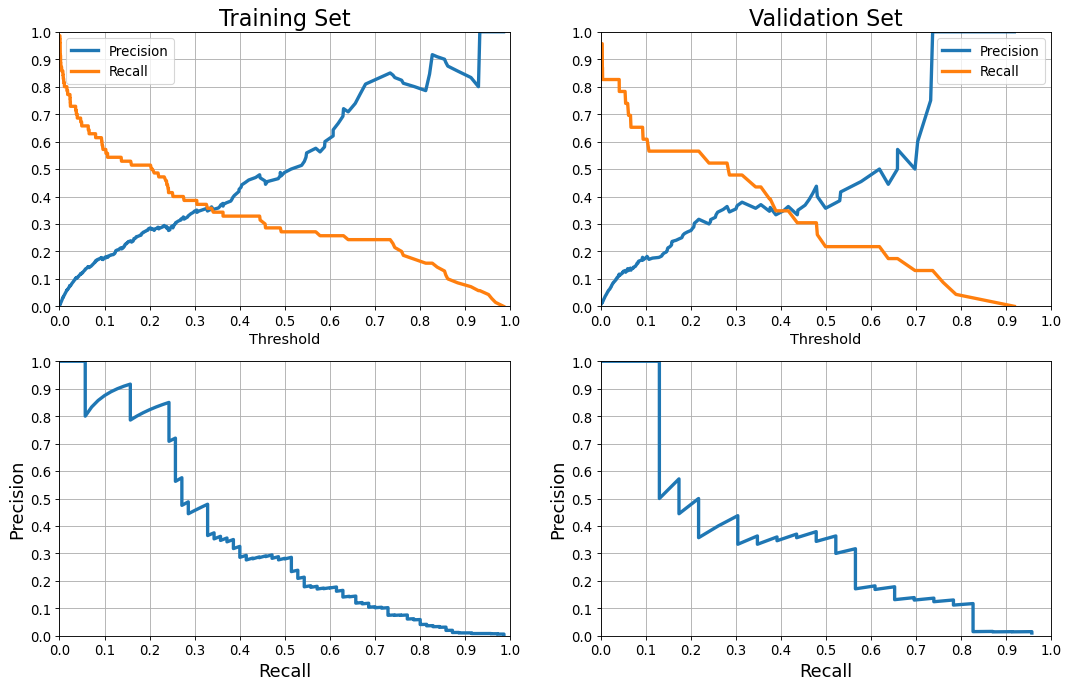

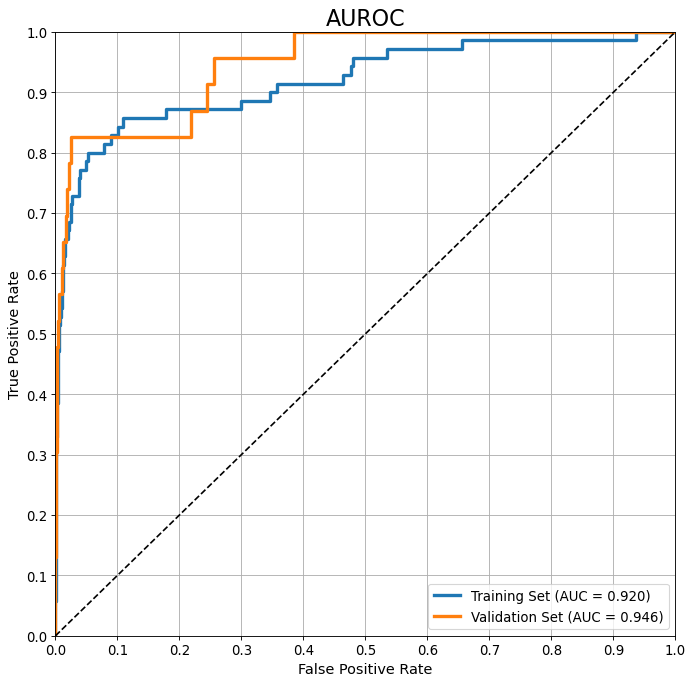

In [37]:
imba_pipeline.fit(X_train_scaled, y_train['mort30'])

y_train_pred = imba_pipeline.predict_proba(X_train_scaled)[:,1]

X_val_scaled = np.concatenate([scaler.transform(X_val[scaled_cols]),
                                 X_val.drop(columns=scaled_cols)], axis=1)

y_val_pred = imba_pipeline.predict_proba(X_val_scaled)[:,1]

print('Training Set AUROC: {}'.format(roc_auc_score(y_train['mort30'], y_train_pred)))
print('Validation Set AUROC: {}'.format(roc_auc_score(y_val['mort30'], y_val_pred)))
print('\n')
plot_prec_recall(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)
print ('\n')
plot_aurocs(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)

### Now try SMOTE instead of RandomOverSampler

In [38]:
SMOTE = imblearn.over_sampling.SMOTE(sampling_strategy = 1.0, random_state=42)  # Balanced

imba_pipeline = make_pipeline(SMOTE, 
                              LogisticRegression(penalty='elasticnet', C=0.15, solver='saga', l1_ratio=1, 
                                                 random_state=42, max_iter=10000))

cv_aurocs(X_train_scaled, y_train['mort30'], imba_pipeline, 5)


CV AUROCs: [0.803, 0.821, 0.827, 0.873, 0.813]
Mean CV AUROC: 0.827 +/- 0.024


Training Set AUROC: 0.9665869306127279
Validation Set AUROC: 0.9339685968905521






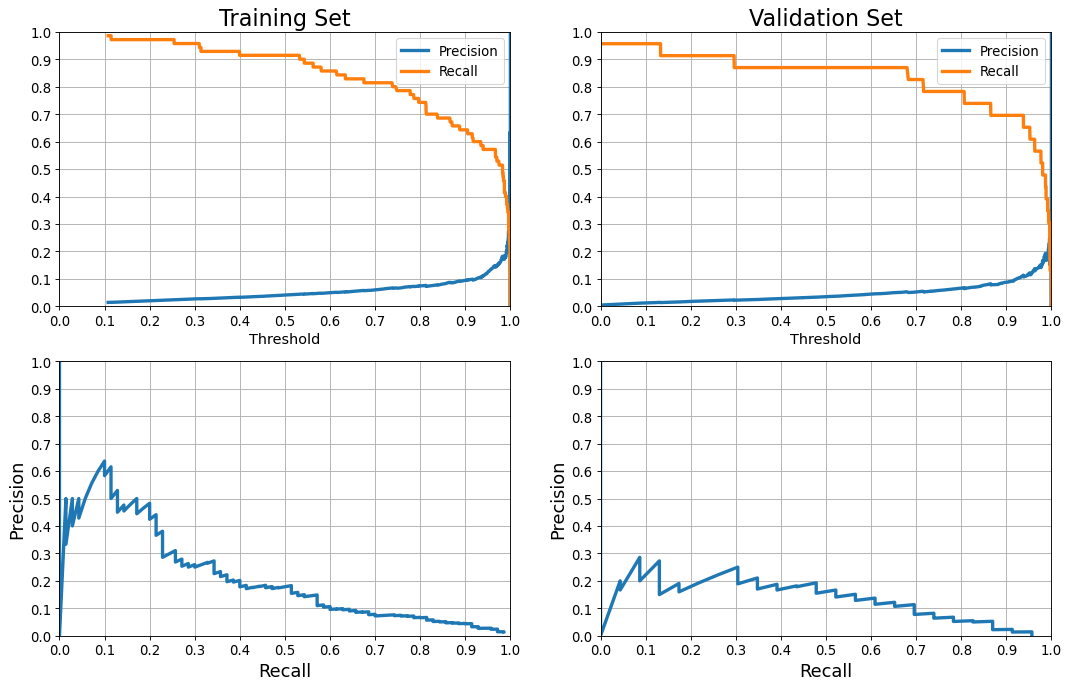

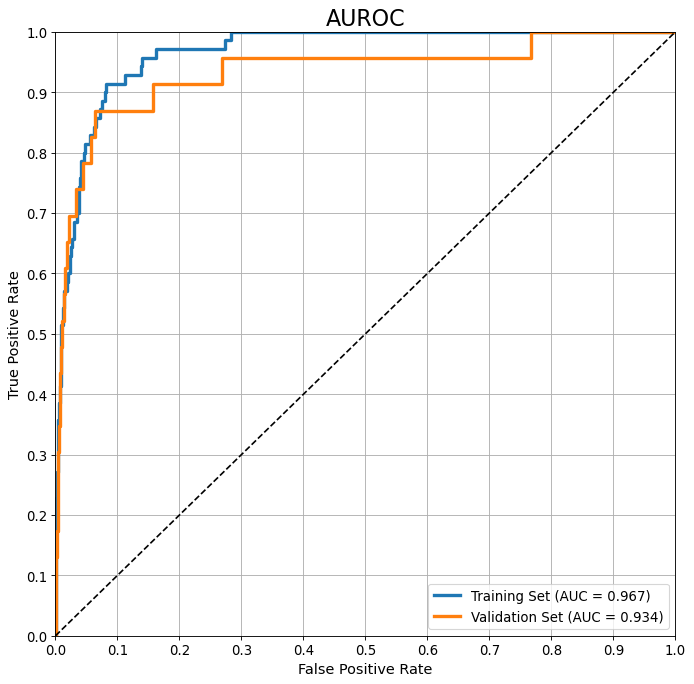

In [39]:
imba_pipeline.fit(X_train_scaled, y_train['mort30'])

y_train_pred = imba_pipeline.predict_proba(X_train_scaled)[:,1]

X_val_scaled = np.concatenate([scaler.transform(X_val[scaled_cols]),
                                 X_val.drop(columns=scaled_cols)], axis=1)

y_val_pred = imba_pipeline.predict_proba(X_val_scaled)[:,1]

print('Training Set AUROC: {}'.format(roc_auc_score(y_train['mort30'], y_train_pred)))
print('Validation Set AUROC: {}'.format(roc_auc_score(y_val['mort30'], y_val_pred)))
print('\n')
plot_prec_recall(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)
print ('\n')
plot_aurocs(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)

In [40]:
SMOTE = imblearn.over_sampling.SMOTE(sampling_strategy = 0.5, random_state=42)  # 2x more 0's

imba_pipeline = make_pipeline(SMOTE, 
                              LogisticRegression(penalty='elasticnet', C=0.15, solver='saga', l1_ratio=1, 
                                                 random_state=42, max_iter=10000))

cv_aurocs(X_train_scaled, y_train['mort30'], imba_pipeline, 5)


CV AUROCs: [0.802, 0.829, 0.785, 0.883, 0.823]
Mean CV AUROC: 0.824 +/- 0.033


Training Set AUROC: 0.9639590218668381
Validation Set AUROC: 0.9360827128583002






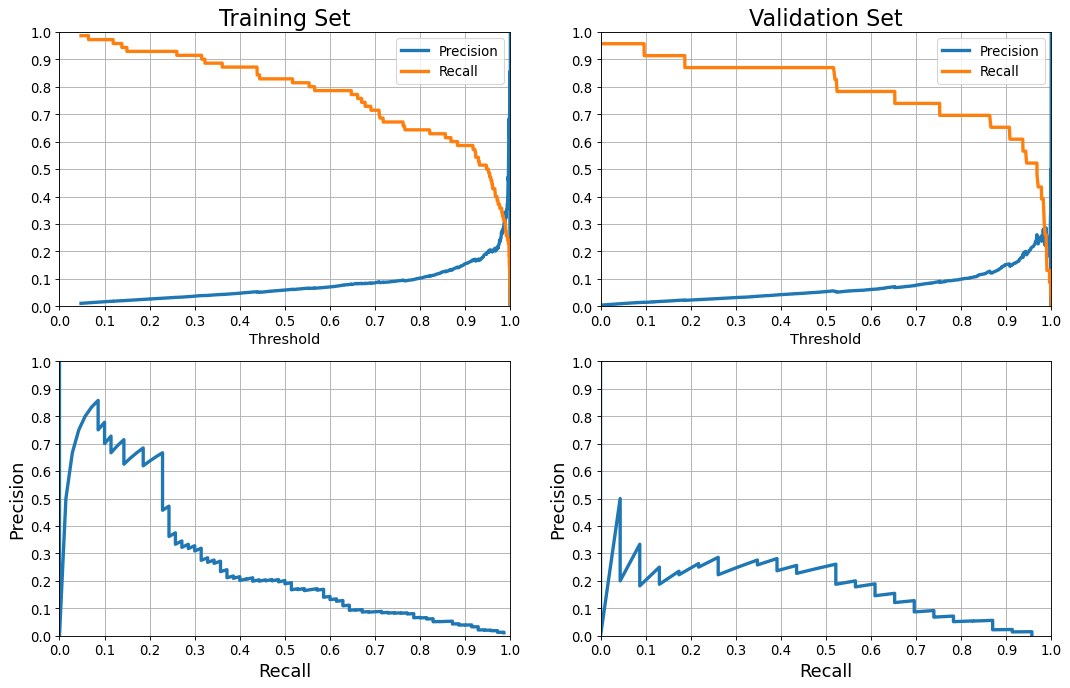

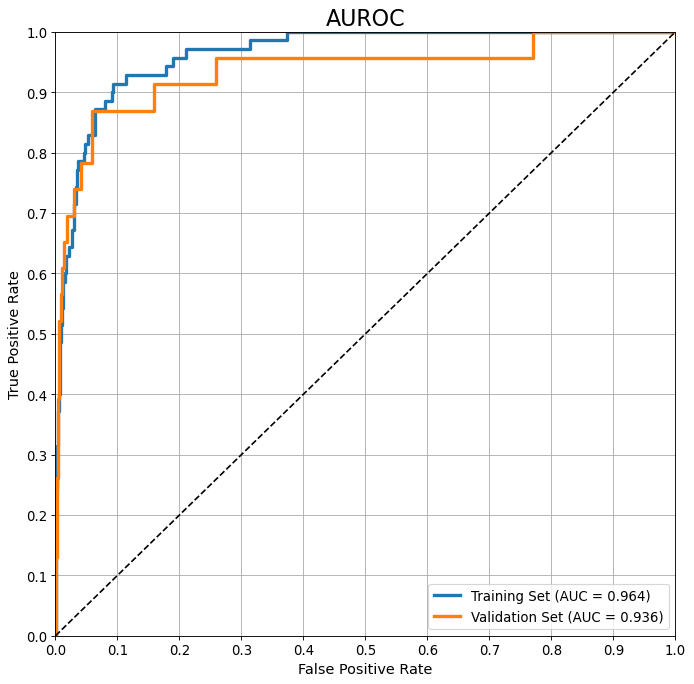

In [41]:
imba_pipeline.fit(X_train_scaled, y_train['mort30'])

y_train_pred = imba_pipeline.predict_proba(X_train_scaled)[:,1]

X_val_scaled = np.concatenate([scaler.transform(X_val[scaled_cols]),
                                 X_val.drop(columns=scaled_cols)], axis=1)

y_val_pred = imba_pipeline.predict_proba(X_val_scaled)[:,1]

print('Training Set AUROC: {}'.format(roc_auc_score(y_train['mort30'], y_train_pred)))
print('Validation Set AUROC: {}'.format(roc_auc_score(y_val['mort30'], y_val_pred)))
print('\n')
plot_prec_recall(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)
print ('\n')
plot_aurocs(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)

## Rebuild "best" model out of all above (10:1 class weights) and find the FN=0 threshold

In [42]:
lr_mort = LogisticRegression(penalty='elasticnet', C=0.15, solver='saga', l1_ratio=1, 
                             random_state=42, max_iter=10000, class_weight={1 : 10, 0 : 1})

cv_aurocs(X_train_scaled, y_train['mort30'], lr_mort, 5)


CV AUROCs: [0.819, 0.888, 0.923, 0.893, 0.876]
Mean CV AUROC: 0.88 +/- 0.034


Training Set AUROC: 0.9491230442830941
Validation Set AUROC: 0.9472011110682458






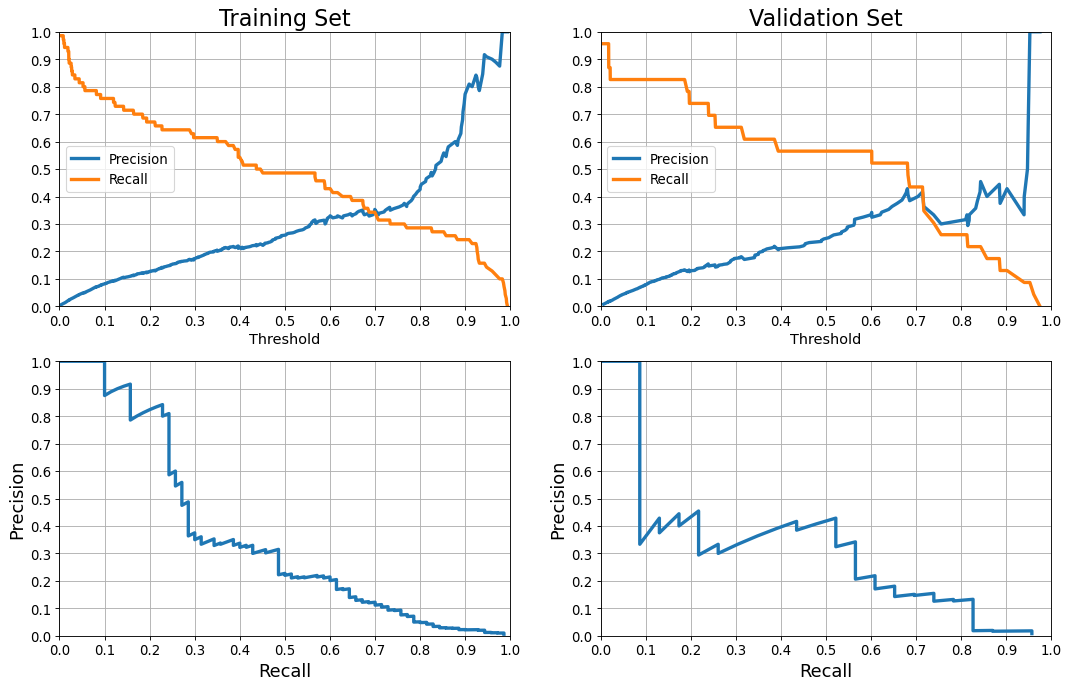

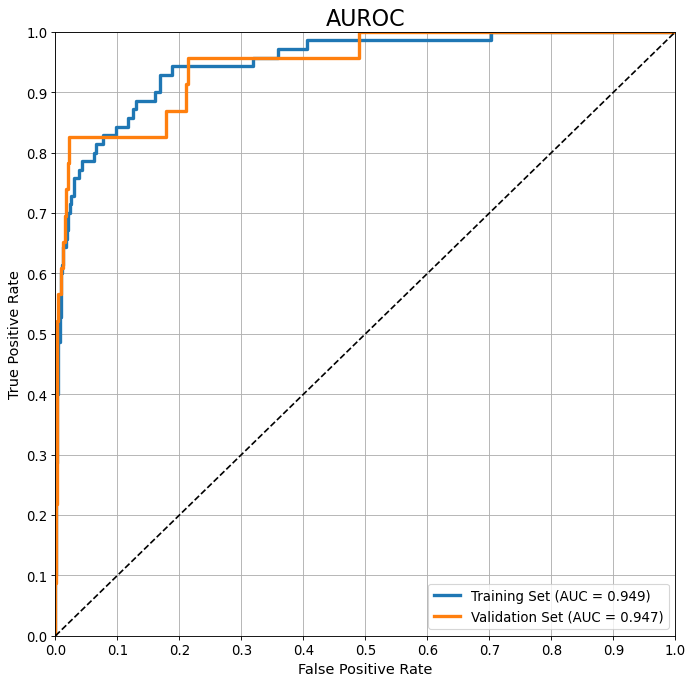

In [43]:
lr_mort.fit(X_train_scaled, y_train['mort30'])

y_train_pred = lr_mort.predict_proba(X_train_scaled)[:,1]

X_val_scaled = np.concatenate([scaler.transform(X_val[scaled_cols]),
                                 X_val.drop(columns=scaled_cols)], axis=1)

y_val_pred = lr_mort.predict_proba(X_val_scaled)[:,1]

print('Training Set AUROC: {}'.format(roc_auc_score(y_train['mort30'], y_train_pred)))
print('Validation Set AUROC: {}'.format(roc_auc_score(y_val['mort30'], y_val_pred)))
print('\n')
plot_prec_recall(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)
print ('\n')
plot_aurocs(y_train['mort30'], y_train_pred, y_val['mort30'], y_val_pred)

In [44]:
fpr, tpr, thresholds = roc_curve(y_val['mort30'], y_val_pred)
auc_data = pd.DataFrame(data={'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

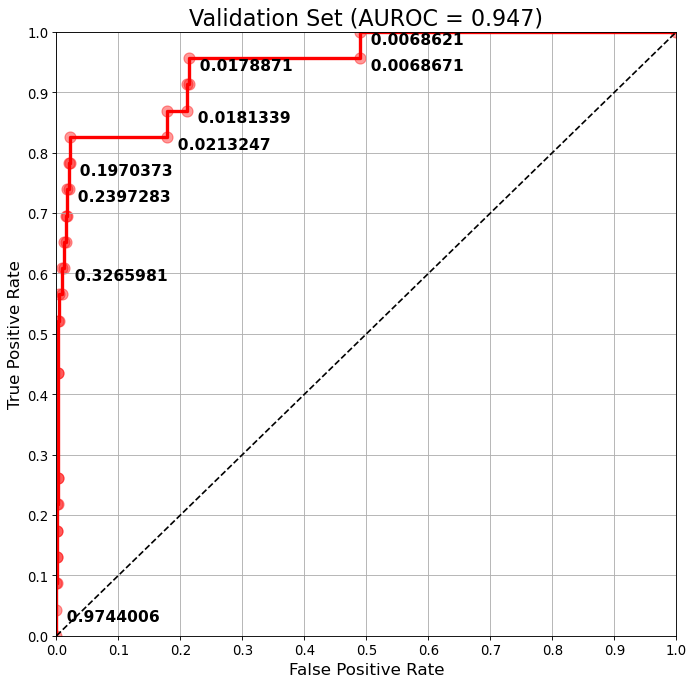

In [45]:
plt.figure(figsize=(10,10), dpi=80)
plt.plot(auc_data['fpr'], auc_data['tpr'], lw=3, color='red')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.scatter(auc_data['fpr'], auc_data['tpr'], s=100, color='red', alpha=0.4)

annotations = [str(round(thresh,7)) for thresh in thresholds]
annotations[0] = '1.0'
for i, label in enumerate(annotations):
    if i in [1, 19, 24, 26, 29, 31, 34, 35, 36]:
        plt.annotate('  ' + label, (auc_data['fpr'][i], auc_data['tpr'][i]),
                     horizontalalignment='left',
                     verticalalignment='top',
                     weight='bold', size=14)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.grid(b=True)
plt.title('Validation Set (AUROC = ' + str(round(roc_auc_score(y_val['mort30'], y_val_pred), 3)) + ')', 
          size=20)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.xticks(size=12)
plt.yticks(size=12);

In [46]:
df_val_preds = pd.DataFrame(data=y_val['mort30'].values, columns=['true'])
df_val_preds['pred'] = y_val_pred

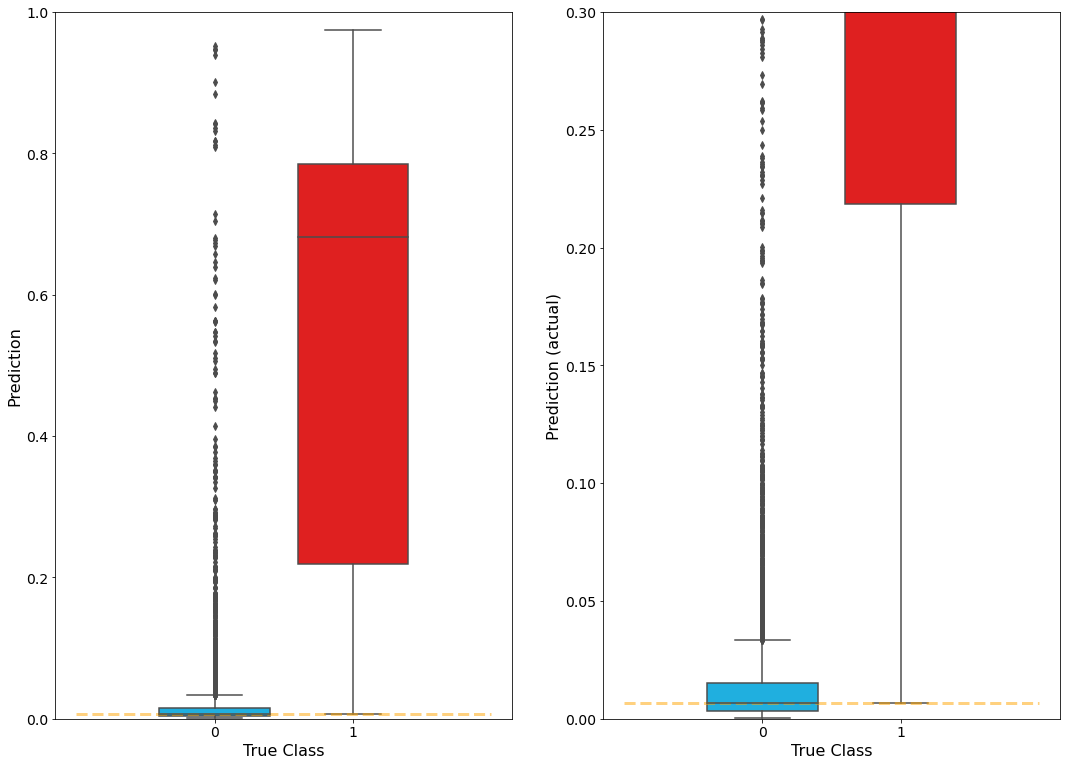

In [47]:
my_pal = {true: "r" if true == 1 else "deepskyblue" for true in df_val_preds['true'].unique()}

plt.figure(figsize=(18,13))
plt.subplot(1, 2, 1)
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
sns.boxplot(data=df_val_preds, x='true', y='pred', palette=my_pal)
plt.plot([-1, 2], [0.0068621, 0.0068621], 
         linestyle='--', c='orange', linewidth=3, alpha=0.5)
plt.xlabel('True Class', size=16)
plt.ylabel('Prediction', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylim([0.0, 1.0]);

plt.subplot(1, 2, 2)
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
sns.boxplot(data=df_val_preds, x='true', y='pred', palette=my_pal)
plt.plot([-1, 2], [0.0068621, 0.0068621], 
         linestyle='--', c='orange', linewidth=3, alpha=0.5)
plt.xlabel('True Class', size=16)
plt.ylabel('Prediction (actual)', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylim([0.0, 0.3]);

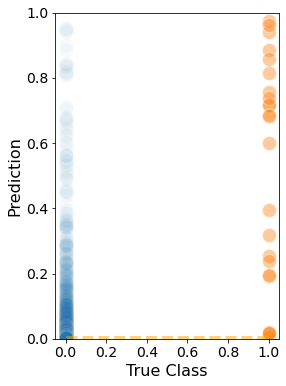

In [48]:
my_pal = {true: "r" if true == 1 else "deepskyblue" for true in df_val_preds['true'].unique()}

plt.figure(figsize=(4,6))
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
sns.scatterplot(data=df_val_preds[df_val_preds['true'] == 0], x='true', y='pred', alpha=0.03, s=200)
sns.scatterplot(data=df_val_preds[df_val_preds['true'] == 1], x='true', y='pred', alpha=0.4, s=200)
plt.plot([-0, 1], [0.0068621, 0.0068621], 
         linestyle='--', c='orange', linewidth=3, alpha=0.5)
plt.xlabel('True Class', size=16)
plt.ylabel('Prediction', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylim([0.0, 1.0]);

In [49]:
thresh = 0.0068621

preds = df_val_preds['pred'].apply(lambda x: 1 if x >= thresh else 0)


C = confusion_matrix(df_val_preds['true'], preds)
print(C)
print('\nRecall (TPR): {}'.format(round(recall_score(df_val_preds['true'], preds), 3)))
print('\nFPR: {}'.format(round(C[0][1]/C[0].sum(), 3)))
print('\nPrecision: {}'.format(round(precision_score(df_val_preds['true'], preds), 3)))

[[2878 2757]
 [   0   23]]

Recall (TPR): 1.0

FPR: 0.489

Precision: 0.008


In [50]:
thresh = 0.0068622

preds = df_val_preds['pred'].apply(lambda x: 1 if x >= thresh else 0)


C = confusion_matrix(df_val_preds['true'], preds)
print(C)
print('\nRecall (TPR): {}'.format(round(recall_score(df_val_preds['true'], preds), 3)))
print('\nFPR: {}'.format(round(C[0][1]/C[0].sum(), 3)))
print('\nPrecision: {}'.format(round(precision_score(df_val_preds['true'], preds), 3)))

[[2878 2757]
 [   1   22]]

Recall (TPR): 0.957

FPR: 0.489

Precision: 0.008


### Save this "best" model for later use in ensembling

In [51]:
import pickle

filename = 'finalized_lr_mort_logloss_opt.sav'
pickle.dump(lr_mort, open(filename, 'wb'))